<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab2_Electron/blob/main/Fit_confidence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial fit confidence

Evgeny Kolonsky, June 2023

Reference: J.R.Taylor, *An Introduction to error analysis*, Chapter 8, Appendix C.



Let $m$-degree polynomial fit of $N$ points $(x_i, y_i)$ is considered to be known:
$$ \hat y_i = a_0 + a_1 x_i + \dots + a_m x^m.$$

The level of confidence can be assesed using $\chi^2$ statistics:
$$ \chi^2_0 = \sum_{i=1}^N \frac{(y_i - \hat y_i)^2}{\sigma^2_y},$$

where $\sigma_y$ is known uncertainty of $y_i$ measurements. $x_i$ measurements error is negligibly small.

Probability that $\chi^2 \geq \chi^2_0$ will be
$$P_d(\chi^2 \geq \chi^2_0),$$ where $d$ is number of degrees of freedom:
$$d = N - m.$$

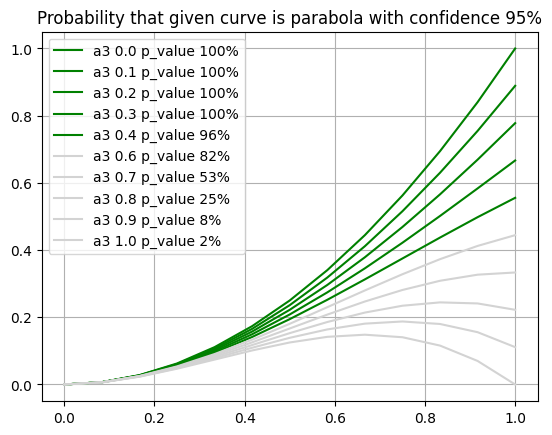

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
import matplotlib.pyplot as plt

# parameters

N = 13 # number of points
DOF = N - 1 # degrees of freedom
S = 5e-2 # sigma_y error
CONFIDENCE = 0.95 # confidence level


def parabola(x, a):
  return a*x**2

xs = np.linspace(0,1, N)
a0, a1, a2 = 0, 0, 1
a3s = np.linspace(0,1,10)
for a3 in a3s:
  ys = a0 + a1*xs + a2*xs**2 - a3*xs**3
  popt, pcov = curve_fit(parabola, xs, ys)
  a2_fit = popt[0]
  y_ = parabola(xs, a2_fit)
  chi_2 = np.sum((ys - y_)**2 / S**2)
  p_value = chi2.sf(chi_2, DOF)
  if p_value < CONFIDENCE:
    color = 'lightgray'
  else:
    color = 'green'
  plt.plot(xs, ys, color=color, label=f'a3 {a3:.1f} p_value {p_value:.0%}')

plt.grid()
plt.legend()
plt.title(f'Probability that given curve is parabola with confidence {CONFIDENCE:.0%}');